
# Factor analysis

The basic idea behind factor analysis is to find for so called factors (or simply variables) that explain the the relationship of observed variables (The set of factors is smaller than the set of observed variables).

## What are the relationships between covariance matrix, factor analysis, and principal component analysis (PCA)?

First, lets have a look on what these things are:

### What is a covarianvce matrix?

A covariance matrix $\Sigma$, is a matrix that... :

 * is square
 * is symmetric 
 * is positive semi-definite ($z^{T} M z > 0 \quad \forall \quad $ nonzero column vectors  $\quad$  $z$)
 * holds information about the covariance of each pair of elements ("variance to multiple dimensions")
 
The unibased estimator of the covariance matrix given a sample is: $\quad \Sigma = E \Big[ (X-E[X])(X-E[X])^T \Big]$




### What is PCA?

The principal component analysis is the process of calculating the principal components of a set of Datapoints. The principal components (sequence of unit vectors) are then used to reduce the dimensionality, or in mathematical language: perform a change of basis. The principal components point into the direction that describe our underlying data best (explain most of the variance).

One of the key components of the PCA is the covariance matrix of the dataset $X$, calculated with $X^TX$ ($X$ is centered)

Our main goal in the end is to map our datapoints to a new space in which they are uncorrelated. For the Transformation we keep only the first $n$ Eigenvectors of $X^TX$ (ordernt in descending magnitude):

$T_n = XW_n$

W is a suqare matrix which contains the first $n$ eigenvectors (columns) of $X^TX$. 

If we calculate $w_i * \sqrt{eigen_i}$, hence we multiply column $i$ with the squareroot of the corresponding eigenvalue (e.g. the variance), we end up with so called **loadings** (Not only in PCA, but also in factor analysis). Loadings can therefore be compared according their magnitude (covariance between variables). loadings are the covariances between the original variables and the unit-scaled components. The Eigenvetor itself is just a coefficient of a orthogonal transformation. If we now "load" the coefficient by the amount of variance, we get a measure of co-variablility.


 
### What is factor analysis?

First again the same description as above: \
The basic idea behind factor analysis is to find for so called factors (or simply variables) that explain the the relationship of observed variables (The set of factors is smaller than the set of observed variables). We my observe 10 variables but can reflect their variation in 3 unobserved "latent" variables. \

##### Why is this useful? 
If we find dependencies between observed variables we can use our gained knowledge to reduce the amount of variables.

##### What are the differences between PCA and FA?

Firstly, both approaches aim to reduce dimensionality but Factor Analysis explicitly assumes the existence of latent factors underlying the observed data. PCA instead seeks to identify variables that are composites of the observed variables. Other than PCA, FA also considers linear combinations of the variables. With FA we want to explain the off-diagonal terms of the correlation matrix, whereas PCA focuses on the terms on the diagonals.


PCA has an analytic solution, whereas FA does not. FA needs to be numerically fit. The PCA solution does not depend on k: With the calculation of the first three PCs (k=3) , the first two of those are going to be identical to the ones found if initially $k$ was set to k=2. That is not true for FA: the solution for k=2 is not (necessarily) subset of the solution for k=3.

##### Why are factors  orthogonal to each other? What’s the consequence?

Orthogonal means in this sense uncorrelated, which means in our case, the factors have a "good quality". Most times factors are not completely uncorrelated. Forcing them to be makes it less likely that the rotation finds a solution with simple structure.
(Rotation: make axis $n+1$ orthogonal to axis $n$ with the constraint that the explained variance is maximized)

#####  Why can factor analysis  be used as a generative model?
Yes it can be used as generative model because we can invert the process: $X_{p\times n}-M_{p\times n}=L_{p\times k}F_{k\times n}+\epsilon$

#####   What is the relationship between factor analysis and autoencoder?
A Factor Analysis maps some observed variables to a certain number of Factors. The connection between the observed variables (Input layer) and the Factors (hidden Nodes) which describe them best can be interpreted as a layer in a autoencoder. 

#####   How would you explain factor analysis to yourself half year ago?

If it was half a year back, I'd have watched a Youtube video first and then looked for a blog that describes the calculations step by step with a toy example. I did the same now, but creating this notebook definitly helped me to make the study efforts more persistent.

## Factor Analysis: Code example

In [5]:
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt 

# Healthy Lifestyle dataframe from Kaggle
cities = pd.read_csv("healthy_lifestyle_city_2021.csv")

# Clean the dataframe
cities['Cost of a bottle of water(City)'] = cities['Cost of a bottle of water(City)'].str[1:]
cities['Cost of a bottle of water(City)'] = cities['Cost of a bottle of water(City)'].astype(float)
cities['Sunshine hours(City)'] = cities['Sunshine hours(City)'].replace(['-'],'0')
cities["Sunshine hours(City)"] = cities["Sunshine hours(City)"].apply(pd.to_numeric)
cities['Cost of a monthly gym membership(City)'] = cities['Cost of a monthly gym membership(City)'].str[1:]
cities['Cost of a monthly gym membership(City)'] = cities['Cost of a monthly gym membership(City)'].astype(float)
cities['Obesity levels(Country)'] = cities['Obesity levels(Country)'].str.rstrip('%').astype('float') / 100.0
cities.drop('City', inplace=True, axis=1)
cities.drop('Rank', inplace=True, axis=1)
cities = cities.drop(cities.index[cities['Pollution(Index score) (City)'] == "-"])
cities = cities.drop(cities.index[cities['Annual avg. hours worked'] == "-"])

# lets have a look at the table
cities.head()
# wow, this looks very good! :)


,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,1858,1.92,0.204,81.2,30.93,1434,7.44,422,1048,34.90
1,2636,1.48,0.290,82.1,26.86,1712,7.22,406,1103,41.66
2,1884,1.94,0.201,81.0,17.33,1501,7.29,132,1008,25.74
3,1821,1.72,0.206,81.8,19.63,1452,7.35,129,598,37.31
4,1630,2.19,0.197,79.8,21.24,1380,7.64,154,523,32.53


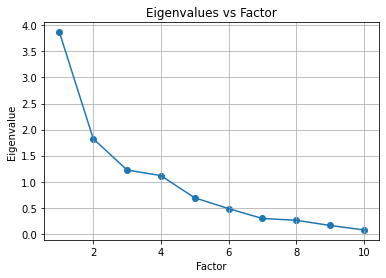

                                               0         1         2         3
Sunshine hours(City)                   -0.363337  0.063127  0.521058  0.059267
Cost of a bottle of water(City)         0.779614 -0.294915 -0.113576  0.238554
Obesity levels(Country)                -0.000498 -0.049861  0.995546 -0.083330
Life expectancy(years) (Country)        0.518348 -0.010175 -0.265674  0.277049
Pollution(Index score) (City)          -0.629910  0.385041  0.111275 -0.020131
Annual avg. hours worked               -0.889648 -0.139741  0.327827  0.278443
Happiness levels(Country)               0.840117 -0.326740  0.150462  0.125461
Outdoor activities(City)               -0.204761  0.648597  0.099064 -0.152503
Number of take out places(City)        -0.096848  0.916730 -0.128170  0.143039
Cost of a monthly gym membership(City)  0.083038 -0.008150 -0.011374  0.820626


In [6]:
# Now we do a factor analysis:
fa = FactorAnalyzer(n_factors = 2, rotation="varimax")
fa.fit(cities)
# That was surprisingly simple! ;)
loadings = fa.loadings_
eigenvalues, eigenvectors = fa.get_eigenvalues()

# Lets get some graphical representation of the Eigenvalues to decide how many factors we are going to consider
x = range(1, cities.shape[1]+1)
plt.scatter(x, eigenvalues)
plt.plot(x, eigenvalues)
plt.title("Eigenvalues vs Factor")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

# We find 4 Eigenvalues greater than one, so we are going to consider 4 factors 
fa = FactorAnalyzer(n_factors = 4, rotation="varimax")
fa.fit(cities)
loadings = fa.loadings_
eigenvalues, eigenvectors = fa.get_eigenvalues()

#Lets have a look at the loadings (Loadings indicate how much a factor explains a variable.)
print(pd.DataFrame(fa.loadings_,index=cities.columns))



We See that for example Factor Nr. 0 has large influence on  **Cost of a bottle of water(City)**  and  **Happiness levels(Country)**  

We can also find out **how much variance is explained by each factor:**

In [7]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          2.960756  1.629230  1.514958  0.954941
Proportional Var  0.296076  0.162923  0.151496  0.095494
Cumulative Var    0.296076  0.458999  0.610494  0.705988


The **Communality** is the proportion of each variable’s variance that can be explained by the factors. Rotations do not influence  the communality of the variables:

In [8]:
print(pd.DataFrame(fa.get_communalities(),index=cities.columns,columns=['Communalities']))

                                        Communalities
Sunshine hours(City)                         0.411013
Cost of a bottle of water(City)              0.764580
Obesity levels(Country)                      1.000542
Life expectancy(years) (Country)             0.416127
Pollution(Index score) (City)                0.557831
Annual avg. hours worked                     0.996002
Happiness levels(Country)                    0.850935
Outdoor activities(City)                     0.495675
Number of take out places(City)              0.886661
Cost of a monthly gym membership(City)       0.680518






Sources:

[1] https://www.displayr.com/factor-analysis-and-principal-component-analysis-a-simple-explanation/

[2] https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another

[3] https://stats.stackexchange.com/questions/123063/is-there-any-good-reason-to-use-pca-instead-of-efa-also-can-pca-be-a-substitut

[4] https://en.wikipedia.org/wiki/Factor_analysis

[5] https://en.wikipedia.org/wiki/Principal_component_analysis

[6] https://en.wikipedia.org/wiki/Covariance